# Walktrough: Cross-Compound Analysis

In this tutorial, we compare the **geometrical space explored during photoinduced dynamics** for related molecular systems: 
- the a Retinal system (**I02**)
- and the compound **I01**, methyleneimmonium ($\mathrm{CH_2NH_2^+}$)

We demonstrate how to **select matching substructures** across different molecules in order to define **comparable, geometry-based descriptors**. These descriptors are then processed and analyzed using **principal component analysis (PCA)** to reduce the dimensionality from six internal coordinates to two, enabling clear and intuitive visualization of the sampled configuration space.

> **Important**: 
> Note, the data of the tutorial is provided as a shnitsel-style NetCDF file for I02 (`./test_data/shnitsel/traj_I02.nc`) and imported from SHARC output files for I01 (`./test_data/sharc/traj_I01_v3.0_triplets/`) to illustrate that we can compare existing datasets to new datasets during analysis.

In [1]:
# from IPython.display import display
import matplotlib.pyplot as plt

import shnitsel as st
import shnitsel.xarray

## 1) Loading and Annotating Molecular Trajectory Data

In the first step, we load the trajectory data of methyleneimmonium (**I01**), retinal (**I02**):

1. Read the trajectory datasets from disk.
2. Clean the inputs to eliminate physically unreasonable data.
3. Merge the data from the different compounds into a common tree that the further analysis will be based on

In [2]:
from shnitsel.clean import sanity_check
from shnitsel.data.tree.support_functions import tree_merge
from pathlib import Path


dt_retinal = st.io.read('test_data/shnitsel/traj_I02.nc')
dt_retinal = sanity_check(dt_retinal)

dt_I01 = st.io.read('./test_data/sharc/traj_I01_v3.0_triplets_nacs_socs/', parallel=False).set_compound_info('I01')
dt_I01 = sanity_check(dt_I01)

mc_tree = tree_merge(dt_retinal, dt_I01)
mc_tree

  0%|          | 0/3 [00:00<?, ?it/s]

<class 'shnitsel.data.tree.tree.ShnitselDBRoot[Trajectory]'> [{'level': 'ShnitselDBRoot', 'children': '2: {\'I02\': \'ABCMeta(_name=\\\'I02\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=None, _children={\\\'0\\\': ABCMeta(_name=\\\'0\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=Trajectory(_raw_dataset=<xarray.Dataset> Size: 343kB\\nDimensions:              (time: 382, state: 3, atom: 14, direction: 3,\\n                          statecomb: 3, full_statecomb: 6, energy_criterion: 2,\\n                          length_criterion: 2)\\nCoordinates: (12/25)\\n  * time                 (time) float64 3kB 0.0 0.5 1.0 ... 189.5 190.0 190.5\\n  * state                (state) int64 24B 1 2 3\\n  * atom                 (atom) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13\\n  * direction            (direction) <U1 12B \\\'x\\\' \\\'y\\\' \\\'z\\\'\\n  * statecomb            (statecomb) object 24B MultiIndex\\n  * full_statecomb       (full_statecomb) object 48B MultiIndex\\n    ...                   ...\\n    delta_t              float64 8B 0.5\\n    max_ts               int64 8B 384\\n    t_max                float64 8B 1e+03\\n    charge               float64 8B 1.0\\n    energy_thresholds    (energy_criterion) float64 16B 0.7 1.0\\n    length_thresholds    (length_criterion) float64 16B 3.0 2.0\\nData variables:\\n    energy               (time, state) float32 5kB ...\\n    forces               (time, state, atom, direction) float32 193kB ...\\n    atXYZ                (time, atom, direction) float32 64kB -4.182 ... 3.616\\n    dip_perm             (time, state, direction) float32 14kB ...\\n    dip_trans            (time, statecomb, direction) float32 14kB ...\\n    socs                 (time, full_statecomb) complex128 37kB ...\\n    phases               (time, state) float32 5kB ...\\n    energy_filtranda     (energy_criterion, time) float32 3kB 0.0 0.1572 ... 0.0\\n    length_filtranda     (length_criterion, time) float32 3kB 1.455 ... 1.21\\nAttributes: (12/17)\\n    input_format:           sharc\\n    t_max:                  1000.0\\n    delta_t:                0.5\\n    max_ts:                 384\\n    completed:              False\\n    input_type:             dynamic\\n    ...                     ...\\n    misc_input_settings:    {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"...\\n    trajectory_input_path:  retinal_tutorial/I02/TRAJ_00001\\n    trajid:                 1\\n    DataTree_Level:         TrajectoryData\\n    trajectory_id:          1359993022\\n    __mol:                  <rdkit.Chem.rdchem.Mol object at 0x7b90241ae4d0>, _is_multi_trajectory=False), _children={}, _attrs={\\\'input_format\\\': \\\'sharc\\\', \\\'t_max\\\': 1000.0, \\\'delta_t\\\': 0.5, \\\'max_ts\\\': 384, \\\'completed\\\': False, \\\'input_type\\\': \\\'dynamic\\\', \\\'input_format_version\\\': \\\'3.0\\\', \\\'num_singlets\\\': 3, \\\'num_doublets\\\': 0, \\\'num_triplets\\\': 0, \\\'has_forces\\\': True, \\\'misc_input_settings\\\': {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"\\\', \\\'veloc\\\': \\\'external\\\', \\\'velocfile\\\': \\\'"veloc"\\\', \\\'nstates\\\': [3], \\\'actstates\\\': \\\'3\\\', \\\'state\\\': \\\'2 mch\\\', \\\'coeff\\\': \\\'auto\\\', \\\'rngseed\\\': \\\'5199\\\', \\\'ezero\\\': \\\'-248.2781283000\\\', \\\'tmax\\\': \\\'1000.000000\\\', \\\'stepsize\\\': \\\'0.500000\\\', \\\'nsubsteps\\\': \\\'25\\\', \\\'integrator\\\': \\\'fvv\\\', \\\'method\\\': \\\'tsh\\\', \\\'surf\\\': \\\'diagonal\\\', \\\'coupling\\\': \\\'overlap\\\', \\\'nogradcorrect\\\': True, \\\'ekincorrect\\\': \\\'parallel_vel\\\', \\\'reflect_frustrated\\\': \\\'none\\\', \\\'decoherence_scheme\\\': \\\'edc\\\', \\\'decoherence_param\\\': \\\'0.1\\\', \\\'hopping_procedure\\\': \\\'sharc\\\', \\\'grad_all\\\': True, \\\'eselect\\\': \\\'0.001000\\\', \\\'select_directly\\\': True, \\\'nospinorbit\\\': Tr

If we want to, we can inspect individual compounds in the tree by array-style access:

In [3]:
mc_tree['I01']

ABCMeta(_name='I01', _dtype=<class 'shnitsel.data.dataset_containers.trajectory.Trajectory'>, _data=None, _children={'1': ABCMeta(_name=1, _dtype=<class 'shnitsel.data.dataset_containers.trajectory.Trajectory'>, _data=Trajectory(_raw_dataset=<xarray.Dataset> Size: 917kB
Dimensions:                 (time: 88, state: 13, atom: 6, direction: 3,
                             statecomb: 78, full_statecomb: 156,
                             energy_criterion: 2, length_criterion: 2)
Coordinates: (12/27)
  * time                    (time) float64 704B 0.0 0.5 1.0 ... 42.5 43.0 43.5
  * state                   (state) int64 104B 1 2 3 4 5 6 7 8 9 10 11 12 13
  * atom                    (atom) int64 48B 0 1 2 3 4 5
  * direction               (direction) <U1 12B 'x' 'y' 'z'
  * statecomb               (statecomb) object 624B MultiIndex
  * full_statecomb          (full_statecomb) object 1kB MultiIndex
    ...                      ...
    delta_t                 float64 8B 0.5
    max_ts                  int64 8B 90
    t_max                   float64 8B 100.0
    charge                  float64 8B 1.0
    energy_thresholds       (energy_criterion) float64 16B 0.7 1.0
    length_thresholds       (length_criterion) float64 16B 3.0 2.0
Data variables:
    energy                  (time, state) float32 5kB -94.4 -94.06 ... -93.89
    forces                  (time, state, atom, direction) float32 82kB -0.06...
    atXYZ                   (time, atom, direction) float32 6kB -0.005705 ......
    nacs                    (time, statecomb, atom, direction) float32 494kB ...
    dip_perm                (time, state, direction) float32 14kB -0.06869 .....
    dip_trans               (time, statecomb, direction) float32 82kB 0.07728...
    socs                    (time, full_statecomb) complex128 220kB 0j ... -4...
    phases                  (time, state) float32 5kB -1.0 -1.0 -1.0 ... 1.0 1.0
    energy_filtranda        (energy_criterion, time) float32 704B 0.0 ... 0.0
    length_filtranda        (length_criterion, time) float32 704B 1.324 ... 1...
Attributes: (12/15)
    input_format:                 sharc
    _shnitsel_setup_for_cleanup:  True
    completed:                    False
    input_type:                   dynamic
    input_format_version:         3.0
    num_singlets:                 4
    ...                           ...
    theory_basis_set:             cc-pVDZ
    est_level:                    CASSCF
    misc_input_settings:          {'input': {'printlevel': '2', 'geomfile': '...
    trajectory_input_path:        test_data/sharc/traj_I01_v3.0_triplets_nacs...
    trajectory_id:                1
    __mol:                        <rdkit.Chem.rdchem.Mol object at 0x7b902395..., _is_multi_trajectory=False), _children={}, _attrs={}, _parent=..., _level_name='DataLeaf'), '2': ABCMeta(_name=2, _dtype=<class 'shnitsel.data.dataset_containers.trajectory.Trajectory'>, _data=Trajectory(_raw_dataset=<xarray.Dataset> Size: 327kB
Dimensions:                 (time: 31, state: 13, atom: 6, direction: 3,
                             statecomb: 78, full_statecomb: 156,
                             energy_criterion: 2, length_criterion: 2)
Coordinates: (12/27)
  * time                    (time) float64 248B 0.0 0.5 1.0 ... 14.0 14.5 15.0
  * state                   (state) int64 104B 1 2 3 4 5 6 7 8 9 10 11 12 13
  * atom                    (atom) int64 48B 0 1 2 3 4 5
  * direction               (direction) <U1 12B 'x' 'y' 'z'
  * statecomb               (statecomb) object 624B MultiIndex
  * full_statecomb          (full_statecomb) object 1kB MultiIndex
    ...                      ...
    delta_t                 float64 8B 0.5
    max_ts                  int64 8B 108
    t_max                   float64 8B 100.0
    charge                  float64 8B 1.0
    energy_thresholds       (energy_criterion) float64 16B 0.7 1.0
    length_thresholds       (length_criterion) float64 16B 3.0 2.0
Data variables:
    energy                  (time, state) float3

## 2) Computing Descriptors for common substructures

In the next step, we **flag a common substructure** that all molecules share, namely the central double bond between an N and a C atom and the adjacent H atoms. This flagging identifies which substructure is considered in the subsequent analysis.

### 2.1) Selecting a substructure

There are two main strategies to select a substructure of interest for further processing:

- provide a SMARTS string that fits the substructure in all compounds
- identify the maximum common substructure automatically

The following example will find the maximum common substructure shared between all compounds within the tree:

In [4]:
from shnitsel.bridges import to_mol
from shnitsel.geo.analogs import extract_analogs
analogs_tree = extract_analogs(mc_tree)
assert analogs_tree is not None

analogs_tree

<class 'shnitsel.data.tree.tree.ShnitselDBRoot[Trajectory]'> [{'level': 'ShnitselDBRoot', 'children': '2: {\'I02\': \'ABCMeta(_name=\\\'I02\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=None, _children={\\\'0\\\': ABCMeta(_name=\\\'0\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=Trajectory(_raw_dataset=<xarray.Dataset> Size: 178kB\\nDimensions:              (time: 382, state: 3, atom: 5, direction: 3,\\n                          statecomb: 3, full_statecomb: 6, energy_criterion: 2,\\n                          length_criterion: 2)\\nCoordinates: (12/26)\\n  * time                 (time) float64 3kB 0.0 0.5 1.0 ... 189.5 190.0 190.5\\n  * state                (state) int64 24B 1 2 3\\n  * atom                 (atom) int64 40B 0 1 2 3 4\\n  * direction            (direction) <U1 12B \\\'x\\\' \\\'y\\\' \\\'z\\\'\\n  * statecomb            (statecomb) object 24B MultiIndex\\n  * full_statecomb       (full_statecomb) object 48B MultiIndex\\n    ...                   ...\\n    max_ts               int64 8B 384\\n    t_max                float64 8B 1e+03\\n    charge               int64 8B 1\\n    energy_thresholds    (energy_criterion) float64 16B 0.7 1.0\\n    length_thresholds    (length_criterion) float64 16B 3.0 2.0\\n    __mol                object 8B <rdkit.Chem.rdchem.Mol object at 0x7b9022f...\\nData variables:\\n    energy               (time, state) float32 5kB ...\\n    forces               (time, state, atom, direction) float32 69kB ...\\n    atXYZ                (time, atom, direction) float32 23kB 3.795 ... 1.982\\n    dip_perm             (time, state, direction) float32 14kB ...\\n    dip_trans            (time, statecomb, direction) float32 14kB ...\\n    socs                 (time, full_statecomb) complex128 37kB ...\\n    phases               (time, state) float32 5kB ...\\n    energy_filtranda     (energy_criterion, time) float32 3kB 0.0 0.1572 ... 0.0\\n    length_filtranda     (length_criterion, time) float32 3kB 1.455 ... 1.21\\nAttributes: (12/17)\\n    input_format:           sharc\\n    t_max:                  1000.0\\n    delta_t:                0.5\\n    max_ts:                 384\\n    completed:              False\\n    input_type:             dynamic\\n    ...                     ...\\n    misc_input_settings:    {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"...\\n    trajectory_input_path:  retinal_tutorial/I02/TRAJ_00001\\n    trajid:                 1\\n    DataTree_Level:         TrajectoryData\\n    trajectory_id:          1359993022\\n    __mol:                  <rdkit.Chem.rdchem.Mol object at 0x7b9022fa9da0>, _is_multi_trajectory=False), _children={}, _attrs={\\\'input_format\\\': \\\'sharc\\\', \\\'t_max\\\': 1000.0, \\\'delta_t\\\': 0.5, \\\'max_ts\\\': 384, \\\'completed\\\': False, \\\'input_type\\\': \\\'dynamic\\\', \\\'input_format_version\\\': \\\'3.0\\\', \\\'num_singlets\\\': 3, \\\'num_doublets\\\': 0, \\\'num_triplets\\\': 0, \\\'has_forces\\\': True, \\\'misc_input_settings\\\': {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"\\\', \\\'veloc\\\': \\\'external\\\', \\\'velocfile\\\': \\\'"veloc"\\\', \\\'nstates\\\': [3], \\\'actstates\\\': \\\'3\\\', \\\'state\\\': \\\'2 mch\\\', \\\'coeff\\\': \\\'auto\\\', \\\'rngseed\\\': \\\'5199\\\', \\\'ezero\\\': \\\'-248.2781283000\\\', \\\'tmax\\\': \\\'1000.000000\\\', \\\'stepsize\\\': \\\'0.500000\\\', \\\'nsubsteps\\\': \\\'25\\\', \\\'integrator\\\': \\\'fvv\\\', \\\'method\\\': \\\'tsh\\\', \\\'surf\\\': \\\'diagonal\\\', \\\'coupling\\\': \\\'overlap\\\', \\\'nogradcorrect\\\': True, \\\'ekincorrect\\\': \\\'parallel_vel\\\', \\\'reflect_frustrated\\\': \\\'none\\\', \\\'decoherence_scheme\\\': \\\'edc\\\', \\\'decoherence_param\\\': \\\'0.1\\\', \\\'hopping_procedure\\\': \\\'sharc\\\', \\\'grad_all\\\': True, \\\'eselect\\\': \\\'0.001000\\\', \\\'select_directly\\\': True, \\\'nospinor

We can also get a more in-detail look at the substructures identified by the analogs function:

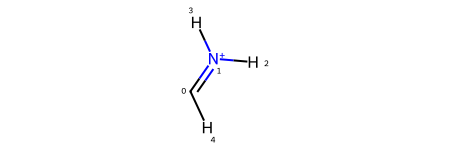

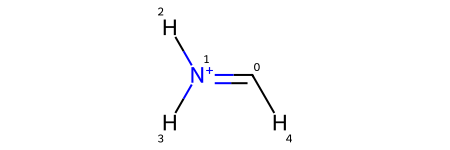

In [5]:
display(analogs_tree['I02/0/data'].mol)
display(analogs_tree['I01/2/data'].mol)

In fact, the matching has found the greatest possible overlap between the two molecules including the charge center around the nitrogen atom, its double bond to a neighboring C atom and the surrounding H atoms.

In the following, we demonstrate how this selection would also have been possible by providing a SMARTS yourself:

In [6]:
from shnitsel.geo.analogs import extract_analogs
smarts_share = '[#6](=[#7](-[#1])-[#1])-[#1]'
tree_smarts_substruct = extract_analogs(mc_tree, smarts=smarts_share)
tree_smarts_substruct

<class 'shnitsel.data.tree.tree.ShnitselDBRoot[Trajectory]'> [{'level': 'ShnitselDBRoot', 'children': '2: {\'I02\': \'ABCMeta(_name=\\\'I02\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=None, _children={\\\'0\\\': ABCMeta(_name=\\\'0\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=Trajectory(_raw_dataset=<xarray.Dataset> Size: 178kB\\nDimensions:              (time: 382, state: 3, atom: 5, direction: 3,\\n                          statecomb: 3, full_statecomb: 6, energy_criterion: 2,\\n                          length_criterion: 2)\\nCoordinates: (12/26)\\n  * time                 (time) float64 3kB 0.0 0.5 1.0 ... 189.5 190.0 190.5\\n  * state                (state) int64 24B 1 2 3\\n  * atom                 (atom) int64 40B 0 1 2 3 4\\n  * direction            (direction) <U1 12B \\\'x\\\' \\\'y\\\' \\\'z\\\'\\n  * statecomb            (statecomb) object 24B MultiIndex\\n  * full_statecomb       (full_statecomb) object 48B MultiIndex\\n    ...                   ...\\n    max_ts               int64 8B 384\\n    t_max                float64 8B 1e+03\\n    charge               int64 8B 1\\n    energy_thresholds    (energy_criterion) float64 16B 0.7 1.0\\n    length_thresholds    (length_criterion) float64 16B 3.0 2.0\\n    __mol                object 8B <rdkit.Chem.rdchem.Mol object at 0x7b90225...\\nData variables:\\n    energy               (time, state) float32 5kB ...\\n    forces               (time, state, atom, direction) float32 69kB ...\\n    atXYZ                (time, atom, direction) float32 23kB 3.795 ... 1.982\\n    dip_perm             (time, state, direction) float32 14kB ...\\n    dip_trans            (time, statecomb, direction) float32 14kB ...\\n    socs                 (time, full_statecomb) complex128 37kB ...\\n    phases               (time, state) float32 5kB ...\\n    energy_filtranda     (energy_criterion, time) float32 3kB 0.0 0.1572 ... 0.0\\n    length_filtranda     (length_criterion, time) float32 3kB 1.455 ... 1.21\\nAttributes: (12/17)\\n    input_format:           sharc\\n    t_max:                  1000.0\\n    delta_t:                0.5\\n    max_ts:                 384\\n    completed:              False\\n    input_type:             dynamic\\n    ...                     ...\\n    misc_input_settings:    {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"...\\n    trajectory_input_path:  retinal_tutorial/I02/TRAJ_00001\\n    trajid:                 1\\n    DataTree_Level:         TrajectoryData\\n    trajectory_id:          1359993022\\n    __mol:                  <rdkit.Chem.rdchem.Mol object at 0x7b902255e610>, _is_multi_trajectory=False), _children={}, _attrs={\\\'input_format\\\': \\\'sharc\\\', \\\'t_max\\\': 1000.0, \\\'delta_t\\\': 0.5, \\\'max_ts\\\': 384, \\\'completed\\\': False, \\\'input_type\\\': \\\'dynamic\\\', \\\'input_format_version\\\': \\\'3.0\\\', \\\'num_singlets\\\': 3, \\\'num_doublets\\\': 0, \\\'num_triplets\\\': 0, \\\'has_forces\\\': True, \\\'misc_input_settings\\\': {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"\\\', \\\'veloc\\\': \\\'external\\\', \\\'velocfile\\\': \\\'"veloc"\\\', \\\'nstates\\\': [3], \\\'actstates\\\': \\\'3\\\', \\\'state\\\': \\\'2 mch\\\', \\\'coeff\\\': \\\'auto\\\', \\\'rngseed\\\': \\\'5199\\\', \\\'ezero\\\': \\\'-248.2781283000\\\', \\\'tmax\\\': \\\'1000.000000\\\', \\\'stepsize\\\': \\\'0.500000\\\', \\\'nsubsteps\\\': \\\'25\\\', \\\'integrator\\\': \\\'fvv\\\', \\\'method\\\': \\\'tsh\\\', \\\'surf\\\': \\\'diagonal\\\', \\\'coupling\\\': \\\'overlap\\\', \\\'nogradcorrect\\\': True, \\\'ekincorrect\\\': \\\'parallel_vel\\\', \\\'reflect_frustrated\\\': \\\'none\\\', \\\'decoherence_scheme\\\': \\\'edc\\\', \\\'decoherence_param\\\': \\\'0.1\\\', \\\'hopping_procedure\\\': \\\'sharc\\\', \\\'grad_all\\\': True, \\\'eselect\\\': \\\'0.001000\\\', \\\'select_directly\\\': True, \\\'nospinor

### 2.2) Calculate descriptors

Upon creating the dataset from the matching substructures of all compounds, we can now compute descriptors. Note, the atom numbering was adjusted, so that we can use descriptors that are sensitive to permutation. Since we only searched for 4 atoms in common, the bats, i.e. bonds, angles torsion would only yield 6 descriptors ($3\cdot 4 - 6 = 6$). Similarly, there are 6 pairwise distances in the molecule ($\frac{1}{2}\cdot 4\cdot(4-1) = 6$).

One could apply the seperate functions `subtract_combinations`, `center`, and `norm` to obtain the pairwise distances, subtract the mean and normalize the features. This is also wrapped in a pipeline within the `get_standardized_pairwise_dists` function provided in `shnitsel.analyze.generic`, which we will use in the following. Note, we have to transpose the resulting array, as the PCA requires the data in shape (frames, descriptors).


/home/tpadmin/git/shnitsel-tools-official/shnitsel/data/traj_combiner_methods.py:491: FutureWarning: In a future version of xarray the default value for compat will change from compat='equals' to compat='override'. This change will result in the following ValueError: Cannot specify both coords='different' and compat='override'. The recommendation is to set compat explicitly for this case.
  frames = xr.concat(


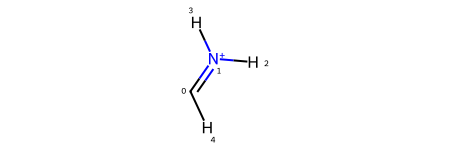

In [7]:
# first we perform PCA over pairwise distances for the whole A03 molecule
from shnitsel.vis.plot import biplot_kde
from shnitsel.analyze.pca import PCA

I02_analog_stacked = analogs_tree["I02"].as_stacked
I02_analog_stacked.mol

In [8]:
from shnitsel.geo.geocalc import get_bats

selection_keys = ['bonds', 'angles', 'dihedrals', 'pyramids']
# Calculate all BATs for all analogs:
dt_analog_bats_all = get_bats(analogs_tree, selection_keys)

# Get the data for just I02 as one dataset
# I02_analog_bats = dt_analog_bats_all["I02"]#.as_stacked
# print(I02_analog_bats)

# Calculate the PCA for I02
pca_res_I02 = PCA(analogs_tree["I02"], structure_selection=selection_keys)

#Since we provided the inputs as a tree, the result is also a tree: 
pca_res_I02


ABCMeta(_name='I02', _dtype=<class 'shnitsel.analyze.pca.PCAResult'>, _data=None, _children={'pca': ABCMeta(_name='pca', _dtype=<class 'shnitsel.analyze.pca.PCAResult'>, _data=<shnitsel.analyze.pca.PCAResult object at 0x7b9025446a80>, _children={}, _attrs={}, _parent=..., _level_name='DataLeaf')}, _attrs={'DataTree_Level': 'CompoundGroup', 'compound_info': {'compound_name': 'I02'}}, _parent=None, _level_name='CompoundGroup', _group_info=GroupInfo(group_name="TrajectoryGroupingMetadata(delta_t_in_fs=0.5, input_format_name='sharc', input_format_version='3.0', est_level=None, theory_basis_set=None, charge_in_e=1.0, num_states=3)", group_attributes={'delta_t_in_fs': 0.5, 'input_format_name': 'sharc', 'input_format_version': '3.0', 'est_level': None, 'theory_basis_set': None, 'charge_in_e': 1.0, 'num_states': 3}, grouped_properties=None))

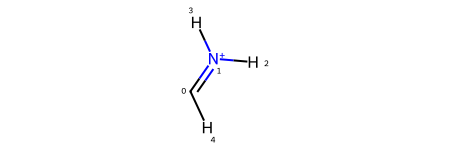

Maximum contributing features overall:
 dih(2,1,0,4) (weight: 0.3931517004966736) (Idxs: (2, 1, 0, 4)) 
 dih(3,1,0,4) (weight: 0.532825767993927) (Idxs: (3, 1, 0, 4)) 
 dist(0,1) (weight: 0.5414503812789917) (Idxs: (np.int64(0), np.int64(1))) 
 angle(1,0,4) (weight: 0.5417289733886719) (Idxs: (1, 0, 4)) 
 pyr(1,(0,2,3)) (weight: 0.9353857636451721) (Idxs: (1, (0, 2, 3))) 


Maximum contributing features to component 0 :
 angle(2,1,3)  (weight: -0.12271258980035782) (Idxs: (2, 1, 3)) 
 dist(0,1)  (weight: 0.1403753012418747) (Idxs: (np.int64(0), np.int64(1))) 
 dih(2,1,0,4)  (weight: -0.2322123497724533) (Idxs: (2, 1, 0, 4)) 
 dih(3,1,0,4)  (weight: 0.347022145986557) (Idxs: (3, 1, 0, 4)) 
 pyr(1,(0,2,3))  (weight: 0.8822901844978333) (Idxs: (1, (0, 2, 3))) 

Maximum contributing features to component 1 :
 pyr(1,(0,2,3))  (weight: 0.3106614649295807) (Idxs: (1, (0, 2, 3))) 
 dih(2,1,0,4)  (weight: 0.31724703311920166) (Idxs: (2, 1, 0, 4)) 
 dih(3,1,0,4)  (weight: -0.4043252766132355) (I

In [9]:
# We can obtain the PCA result: 
pca_res_I02_unwrapped =  pca_res_I02["/pca"].data
# And take a look at the most impactful features identified by PCA:
display(I02_analog_stacked.mol)
print(pca_res_I02_unwrapped.explain_loadings())


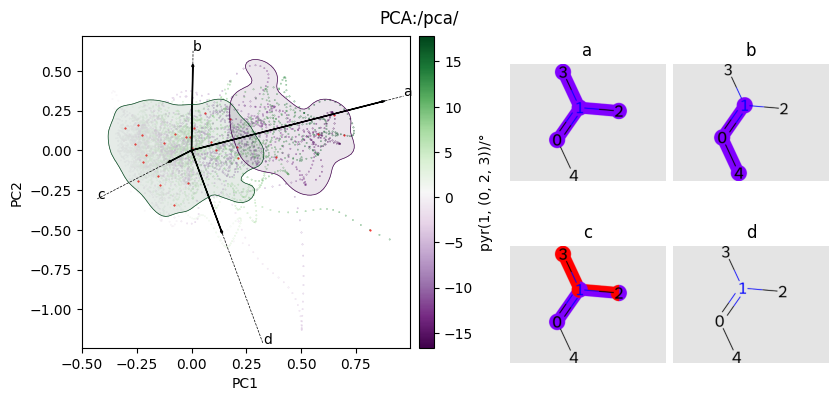

In [10]:
# We can also take a look at the visualized results:
kde_data = biplot_kde(
    analogs_tree["I02"], 1, (0, 2, 3), pca_data=pca_res_I02, num_bins=4, scatter_color_property="geo"
)

## 3) Compare Compounds

We have started with different compounds, so it just seems reasonable to try and see, how the PCA of these different compounds compare. 
For this, we can simply apply the PCA to the combined tree and plot the analysis result, which will be performed on each component separately


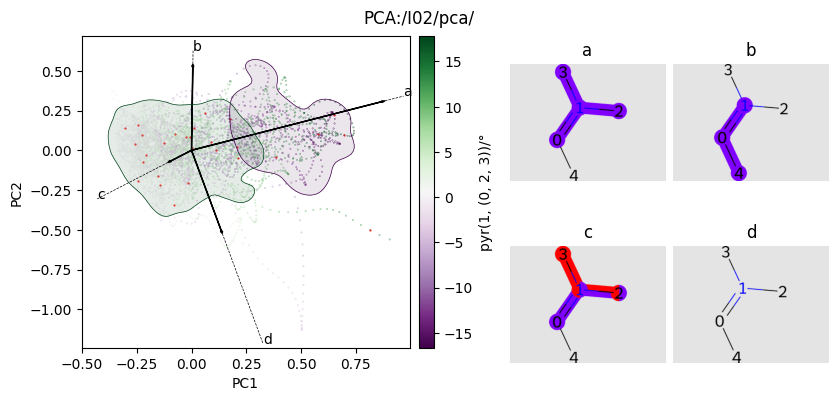

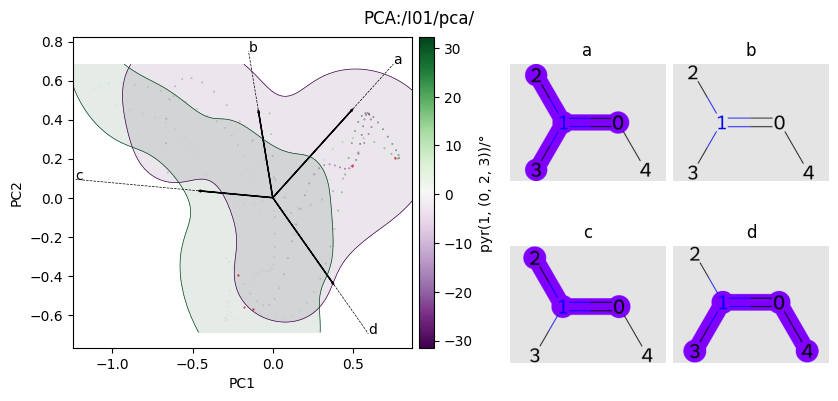

In [11]:

pca_res = PCA(analogs_tree, structure_selection=selection_keys)
kde_plot = biplot_kde(
    analogs_tree, 1, (0, 2, 3), pca_data=pca_res, num_bins=4, scatter_color_property="geo"
)

Let us take a look at the loadings of the different PCA results:

In [12]:
for path, pca_data in pca_res.collect_data(with_path = True):
    print(f"Results for entry {path}")
    print(pca_data.explain_loadings())

Results for entry /I02/pca/
Maximum contributing features overall:
 dih(2,1,0,4) (weight: 0.3931517004966736) (Idxs: (2, 1, 0, 4)) 
 dih(3,1,0,4) (weight: 0.532825767993927) (Idxs: (3, 1, 0, 4)) 
 dist(0,1) (weight: 0.5414503812789917) (Idxs: (np.int64(0), np.int64(1))) 
 angle(1,0,4) (weight: 0.5417289733886719) (Idxs: (1, 0, 4)) 
 pyr(1,(0,2,3)) (weight: 0.9353857636451721) (Idxs: (1, (0, 2, 3))) 


Maximum contributing features to component 0 :
 angle(2,1,3)  (weight: -0.12271258980035782) (Idxs: (2, 1, 3)) 
 dist(0,1)  (weight: 0.1403753012418747) (Idxs: (np.int64(0), np.int64(1))) 
 dih(2,1,0,4)  (weight: -0.2322123497724533) (Idxs: (2, 1, 0, 4)) 
 dih(3,1,0,4)  (weight: 0.347022145986557) (Idxs: (3, 1, 0, 4)) 
 pyr(1,(0,2,3))  (weight: 0.8822901844978333) (Idxs: (1, (0, 2, 3))) 

Maximum contributing features to component 1 :
 pyr(1,(0,2,3))  (weight: 0.3106614649295807) (Idxs: (1, (0, 2, 3))) 
 dih(2,1,0,4)  (weight: 0.31724703311920166) (Idxs: (2, 1, 0, 4)) 
 dih(3,1,0,4)  (wei

We see that the pyramidalization around the center N-atom with index `1` is shared between both compounds. 
But the remaining parameters may look different. 

To visually compare the geometrical space exploration of the two compounds, we can now project the features for both components onto the same principal components. 
Let us use `I01` as the basis and then project the results for `I02` onto the same subspace.

For this purpose, we can use the tree of BATs for all compounds and use the helper method `.project_array()` of the PCAResult class:

In [13]:
# Retrieve the PCA for I01
pca_res_I01 = pca_res["I01/pca"].data

# Project all features onto the principal components for I01
# The pca result offers the function `.project_array` to project an arbitrary array onto the results of the PCA pipeline

# We
I01_projected_features = dt_analog_bats_all.map_data(pca_res_I01.project_array)
I01_projected_features

ERROR:root:"The 'units' attribute of the DataArray must be set and of type str."
ERROR:root:"The 'units' attribute of the DataArray must be set and of type str."


<class 'shnitsel.data.tree.tree.ShnitselDBRoot[DataArray]'> [{'level': 'ShnitselDBRoot', 'children': '2: {\'I02\': \'ABCMeta(_name=\\\'I02\\\', _dtype=<class \\\'xarray.core.dataarray.DataArray\\\'>, _data=None, _children={\\\'0\\\': ABCMeta(_name=\\\'0\\\', _dtype=<class \\\'xarray.core.dataarray.DataArray\\\'>, _data=<xarray.DataArray \\\'BATs(+P)\\\' (time: 382, PC: 2)> Size: 3kB\\narray([[-0.6254917 , -0.09734899],\\n       [-0.6464999 , -0.0484388 ],\\n       [-0.67402184,  0.03309301],\\n       [-0.70419866,  0.13363382],\\n       [-0.7331541 ,  0.23890562],\\n       [-0.75766313,  0.33665586],\\n       [-0.775396  ,  0.41767192],\\n       [-0.7848985 ,  0.47574037],\\n       [-0.7854734 ,  0.507215  ],\\n       [-0.7770682 ,  0.5105981 ],\\n       [-0.7602122 ,  0.4862901 ],\\n       [-0.7360109 ,  0.43656468],\\n       [-0.7061943 ,  0.3657167 ],\\n       [-0.67298806,  0.28012264],\\n       [-0.6283088 ,  0.19286141],\\n       [-0.58555686,  0.11228807],\\n       [-0.55005157,  0.05069636],\\n       [-0.52558124,  0.01960403],\\n       [-0.5146443 ,  0.02604952],\\n       [-0.5176539 ,  0.07003039],\\n...\\n       [-0.69673634,  0.24430661],\\n       [-0.7146388 ,  0.28021115],\\n       [-0.73186016,  0.31933695],\\n       [-0.7462431 ,  0.35783088],\\n       [-0.7583394 ,  0.3948323 ],\\n       [-0.76700175,  0.42741263],\\n       [-0.77141476,  0.45306677],\\n       [-0.77107316,  0.4698103 ],\\n       [-0.76577806,  0.47627598],\\n       [-0.7556493 ,  0.47181845],\\n       [-0.7411612 ,  0.45663095],\\n       [-0.72318864,  0.43187237],\\n       [-0.70306516,  0.39979833],\\n       [-0.682621  ,  0.36383504],\\n       [-0.6641312 ,  0.32846093],\\n       [-0.6500556 ,  0.29866457],\\n       [-0.64249134,  0.27887607],\\n       [-0.6422663 ,  0.2688818 ],\\n       [-0.6493867 ,  0.27127218],\\n       [-0.66259366,  0.28449434]], dtype=float32)\\nCoordinates:\\n  * time     (time) float64 3kB 0.0 0.5 1.0 1.5 2.0 ... 189.0 189.5 190.0 190.5\\n    astate   (time) int32 2kB 2 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1 1\\n    sdiag    (time) int32 2kB 2 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1 1\\n    delta_t  float64 8B 0.5\\n    max_ts   int64 8B 384\\n    t_max    float64 8B 1e+03\\n    charge   int64 8B 1\\n    __mol    object 8B <rdkit.Chem.rdchem.Mol object at 0x7b9022fa9da0>\\nDimensions without coordinates: PC\\nAttributes:\\n    sign:       unsigned\\n    long_name:  Positions, bonds, angles, tortions, and pyramidalizations, _children={}, _attrs={\\\'input_format\\\': \\\'sharc\\\', \\\'t_max\\\': 1000.0, \\\'delta_t\\\': 0.5, \\\'max_ts\\\': 384, \\\'completed\\\': False, \\\'input_type\\\': \\\'dynamic\\\', \\\'input_format_version\\\': \\\'3.0\\\', \\\'num_singlets\\\': 3, \\\'num_doublets\\\': 0, \\\'num_triplets\\\': 0, \\\'has_forces\\\': True, \\\'misc_input_settings\\\': {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"\\\', \\\'veloc\\\': \\\'external\\\', \\\'velocfile\\\': \\\'"veloc"\\\', \\\'nstates\\\': [3], \\\'actstates\\\': \\\'3\\\', \\\'state\\\': \\\'2 mch\\\', \\\'coeff\\\': \\\'auto\\\', \\\'rngseed\\\': \\\'5199\\\', \\\'ezero\\\': \\\'-248.2781283000\\\', \\\'tmax\\\': \\\'1000.000000\\\', \\\'stepsize\\\': \\\'0.500000\\\', \\\'nsubsteps\\\': \\\'25\\\', \\\'integrator\\\': \\\'fvv\\\', \\\'method\\\': \\\'tsh\\\', \\\'surf\\\': \\\'diagonal\\\', \\\'coupling\\\': \\\'overlap\\\', \\\'nogradcorrect\\\': True, \\\'ekincorrect\\\': \\\'parallel_vel\\\', \\\'reflect_frustrated\\\': \\\'none\\\', \\\'decoherence_scheme\\\': \\\'edc\\\', \\\'decoherence_param\\\': \\\'0.1\\\', \\\'hopping_procedure\\\': \\\'sharc\\\', \\\'grad_all\\\': True, \\\'eselect\\\': \\\'0.001000\\\', \\\'select_directly\\\': True, \\\'nospinorbit\\\': True, \\\'write_grad\\\': True, \\\'write_nacdr\\\': True, \\\'write_overlap\\\': True, \\\'output_format\\\': \\\'ascii\\\', \\\'output_dat_steps\\\': \\\'1\\\'}, \\\'output.dat\\\': {\\\'SHARC_version\\\': \\\'3.0\\\', \\\'method\\

Now we just need to plot the data for the different compounds into a graph:

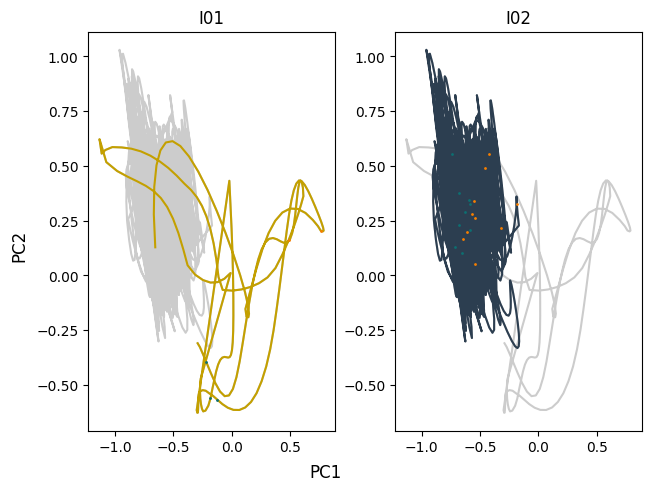

In [14]:
from shnitsel.analyze.hops import filter_data_at_hops
from shnitsel.vis.colormaps import st_grey, st_yellow, st_orange

fig, axs = plt.subplot_mosaic([['I01', 'I02']], layout='constrained')
for ax_name, ax in axs.items():
    ax.set_title(ax_name)
    for compound_name, data in I01_projected_features.compounds.items():
        ax.plot(data.as_stacked.isel(PC=0), data.as_stacked.isel(PC=1), c='#ccc', rasterized=True)

    compound_data = I01_projected_features[ax_name].as_stacked
    if ax_name == 'I01':
        compound_color = st_yellow # if dih_end < 70 else '#2c3e50' if dih_end > 110 else 'gray'
    else:
        compound_color = st_grey
    ax.plot(compound_data.isel(PC=0), compound_data.isel(PC=1), c=compound_color, rasterized=True)


    hops_positions_21 = filter_data_at_hops(compound_data, "2->1")
    hops_positions_32 = filter_data_at_hops(compound_data, "3->2")
    ax.scatter(hops_positions_21.isel(PC=0), hops_positions_21.isel(PC=1), c=st_orange, s=1, zorder=10, rasterized=True)
    ax.scatter(hops_positions_32.isel(PC=0), hops_positions_32.isel(PC=1), c='#0D6F71', s=1, zorder=10, rasterized=True)
    
fig.supxlabel('PC1')
fig.supylabel('PC2')
fig.savefig("./PCA_across_compounds_I01_I02_proj1.pdf", dpi=300)

In [15]:
# Retrieve the PCA for I02
pca_res_I02 = pca_res["I02/pca"].data

# Project all features onto the principal components for I02
# The pca result offers the function `.project_array` to project an arbitrary array onto the results of the PCA pipeline

# We
I02_projected_features = dt_analog_bats_all.map_data(pca_res_I02.project_array)
I02_projected_features

ERROR:root:"The 'units' attribute of the DataArray must be set and of type str."
ERROR:root:"The 'units' attribute of the DataArray must be set and of type str."


<class 'shnitsel.data.tree.tree.ShnitselDBRoot[DataArray]'> [{'level': 'ShnitselDBRoot', 'children': '2: {\'I02\': \'ABCMeta(_name=\\\'I02\\\', _dtype=<class \\\'xarray.core.dataarray.DataArray\\\'>, _data=None, _children={\\\'0\\\': ABCMeta(_name=\\\'0\\\', _dtype=<class \\\'xarray.core.dataarray.DataArray\\\'>, _data=<xarray.DataArray \\\'BATs(+P)\\\' (time: 382, PC: 2)> Size: 3kB\\narray([[-1.30418316e-01,  2.95992494e-01],\\n       [-1.50043249e-01,  2.76579738e-01],\\n       [-1.69018880e-01,  2.49599427e-01],\\n       [-1.86950624e-01,  2.17310846e-01],\\n       [-2.03655615e-01,  1.81898475e-01],\\n       [-2.19132826e-01,  1.45303696e-01],\\n       [-2.33508408e-01,  1.09150946e-01],\\n       [-2.46979892e-01,  7.47344047e-02],\\n       [-2.59781599e-01,  4.30279821e-02],\\n       [-2.72160172e-01,  1.46851540e-02],\\n       [-2.84369409e-01, -9.95606184e-03],\\n       [-2.96665221e-01, -3.08788568e-02],\\n       [-3.09297025e-01, -4.84095514e-02],\\n       [-3.22244942e-01, -6.35058284e-02],\\n       [-3.05378675e-01, -7.26715177e-02],\\n       [-2.83667445e-01, -8.05303454e-02],\\n       [-2.61457205e-01, -8.89224485e-02],\\n       [-2.39000320e-01, -9.90348309e-02],\\n       [-2.16656864e-01, -1.11596480e-01],\\n       [-1.94822833e-01, -1.26625538e-01],\\n...\\n       [-1.54490054e-01,  6.86647445e-02],\\n       [-1.49519727e-01,  6.18876517e-02],\\n       [-1.43867001e-01,  5.12551516e-02],\\n       [-1.36907429e-01,  3.75430733e-02],\\n       [-1.31158322e-01,  2.48827636e-02],\\n       [-1.26363784e-01,  1.38117522e-02],\\n       [-1.22313105e-01,  4.59605455e-03],\\n       [-1.18852936e-01, -2.68451869e-03],\\n       [-1.15888201e-01, -8.07696581e-03],\\n       [-1.13378629e-01, -1.17294490e-02],\\n       [-1.11334071e-01, -1.38982385e-02],\\n       [-1.09816238e-01, -1.49959177e-02],\\n       [-1.08946599e-01, -1.56726539e-02],\\n       [-1.08939417e-01, -1.68889314e-02],\\n       [-1.10162579e-01, -1.99138075e-02],\\n       [-1.13203868e-01, -2.60947943e-02],\\n       [-1.18842617e-01, -3.63691598e-02],\\n       [-1.25353575e-01, -5.41452244e-02],\\n       [-1.35355234e-01, -7.53727779e-02],\\n       [-1.49208337e-01, -9.76940244e-02]], dtype=float32)\\nCoordinates:\\n  * time     (time) float64 3kB 0.0 0.5 1.0 1.5 2.0 ... 189.0 189.5 190.0 190.5\\n    astate   (time) int32 2kB 2 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1 1\\n    sdiag    (time) int32 2kB 2 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1 1\\n    delta_t  float64 8B 0.5\\n    max_ts   int64 8B 384\\n    t_max    float64 8B 1e+03\\n    charge   int64 8B 1\\n    __mol    object 8B <rdkit.Chem.rdchem.Mol object at 0x7b9022fa9da0>\\nDimensions without coordinates: PC\\nAttributes:\\n    sign:       unsigned\\n    long_name:  Positions, bonds, angles, tortions, and pyramidalizations, _children={}, _attrs={\\\'input_format\\\': \\\'sharc\\\', \\\'t_max\\\': 1000.0, \\\'delta_t\\\': 0.5, \\\'max_ts\\\': 384, \\\'completed\\\': False, \\\'input_type\\\': \\\'dynamic\\\', \\\'input_format_version\\\': \\\'3.0\\\', \\\'num_singlets\\\': 3, \\\'num_doublets\\\': 0, \\\'num_triplets\\\': 0, \\\'has_forces\\\': True, \\\'misc_input_settings\\\': {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"\\\', \\\'veloc\\\': \\\'external\\\', \\\'velocfile\\\': \\\'"veloc"\\\', \\\'nstates\\\': [3], \\\'actstates\\\': \\\'3\\\', \\\'state\\\': \\\'2 mch\\\', \\\'coeff\\\': \\\'auto\\\', \\\'rngseed\\\': \\\'5199\\\', \\\'ezero\\\': \\\'-248.2781283000\\\', \\\'tmax\\\': \\\'1000.000000\\\', \\\'stepsize\\\': \\\'0.500000\\\', \\\'nsubsteps\\\': \\\'25\\\', \\\'integrator\\\': \\\'fvv\\\', \\\'method\\\': \\\'tsh\\\', \\\'surf\\\': \\\'diagonal\\\', \\\'coupling\\\': \\\'overlap\\\', \\\'nogradcorrect\\\': True, \\\'ekincorrect\\\': \\\'parallel_vel\\\', \\\'reflect_frustrated\\\': \\\'none\\\', \\\'decoherence_scheme\\\': \\\'edc\\\', \\\'decoherence_param\\\': \\\'0.1\\\', \\\'hopping_procedure\\\': \\\'sharc\\\', \\\'grad_all\\\': True, 

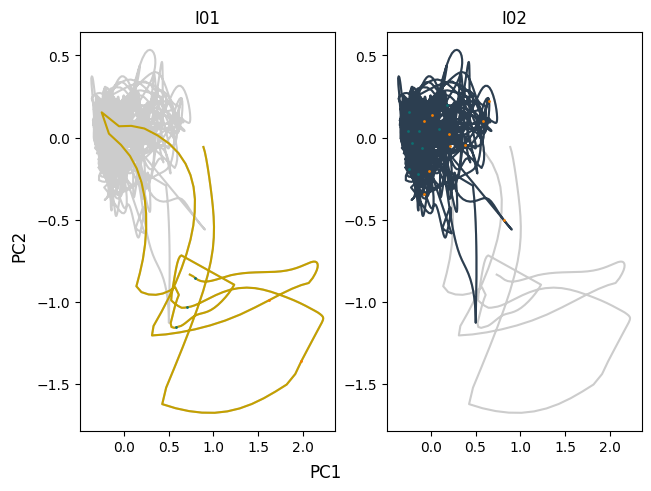

In [16]:
from shnitsel.analyze.hops import filter_data_at_hops
from shnitsel.vis.colormaps import st_grey, st_yellow, st_orange

fig, axs = plt.subplot_mosaic([['I01', 'I02']], layout='constrained')
for ax_name, ax in axs.items():
    ax.set_title(ax_name)
    for compound_name, data in I02_projected_features.compounds.items():
        ax.plot(data.as_stacked.isel(PC=0), data.as_stacked.isel(PC=1), c="#ccc", rasterized=True)

    compound_data = I02_projected_features[ax_name].as_stacked
    if ax_name == 'I01':
        compound_color = st_yellow # if dih_end < 70 else '#2c3e50' if dih_end > 110 else 'gray'
    else:
        compound_color = st_grey
    ax.plot(compound_data.isel(PC=0), compound_data.isel(PC=1), c=compound_color, rasterized=True)

    hops_positions_21 = filter_data_at_hops(compound_data, "2->1")
    hops_positions_32 = filter_data_at_hops(compound_data, "3->2")
    ax.scatter(hops_positions_21.isel(PC=0), hops_positions_21.isel(PC=1), c=st_orange, s=1, zorder=10, rasterized=True)
    ax.scatter(hops_positions_32.isel(PC=0), hops_positions_32.isel(PC=1), c='#0D6F71', s=1, zorder=10, rasterized=True)
    
fig.supxlabel('PC1')
fig.supylabel('PC2')
fig.savefig("./PCA_across_compounds_I01_I02_proj2.pdf", dpi=300)

In either projection (to the PC of `I01` or `I02`), it becomes apparent that both compounds cover distinct regions of phase space with hops between different states notably happening in entirely different regions of phase space. 
